In [132]:
 #Social_Network_Ads.csv

**Import libraries**

In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


**Importing the dataset**

In [134]:
data = pd.read_csv('/content/Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [135]:
del data['User ID']

In [136]:
data = data.drop_duplicates()
data.shape

(380, 4)

In [137]:
data.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [138]:
data.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [139]:
data.describe()

,Age,EstimatedSalary,Purchased
count,380.000000,380.000000,380.000000
mean,37.586842,70421.052632,0.368421
std,10.592492,34604.155483,0.483012
min,18.000000,15000.000000,0.000000
25%,29.000000,43000.000000,0.000000
50%,37.000000,70500.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [140]:
IQR = data.EstimatedSalary.quantile(0.75) - data.EstimatedSalary.quantile(0.25)
upper_threshold = data.EstimatedSalary.quantile(0.75) + (IQR*1.5)
lower_threshold = data.EstimatedSalary.quantile(0.25) - (IQR*1.5)
lower_threshold,upper_threshold

(-24500.0, 155500.0)

In [141]:
IQR = data.Age.quantile(0.75) - data.Age.quantile(0.25)
upper_threshold = data.Age.quantile(0.75) + (IQR*1.5)
lower_threshold = data.Age.quantile(0.25) - (IQR*1.5)
lower_threshold,upper_threshold

(3.5, 71.5)

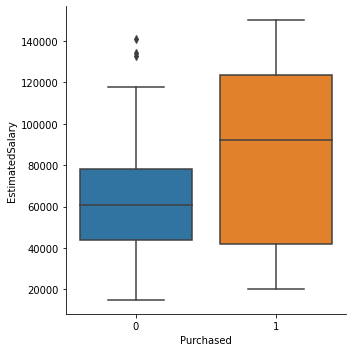

In [142]:
sns.catplot(data=data, x="Purchased", y="EstimatedSalary", kind="box")

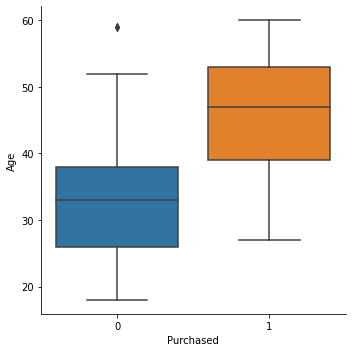

In [143]:
sns.catplot(data=data, x="Purchased", y="Age", kind="box")

In [144]:
data['Gender'].value_counts(normalize = True)

Female    0.521053
Male      0.478947
Name: Gender, dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='count'>

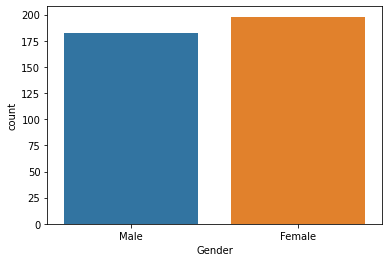

In [145]:
sns.countplot(x= data['Gender'],data = data)

<AxesSubplot:xlabel='Gender'>

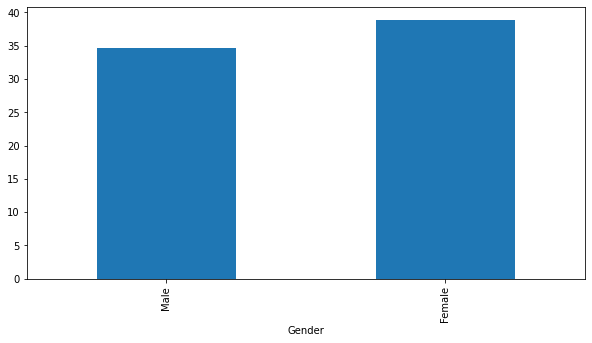

In [146]:
plt.figure(figsize=(10,5))
(data.groupby('Gender')['Purchased'].mean()*100).sort_values().plot(kind = 'bar')

In [147]:
#data =pd.get_dummies(data,columns = ['Gender'],drop_first = True)

In [148]:
data

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [149]:
from sklearn.model_selection import train_test_split
X = data.drop(['Purchased','Gender'],axis=1)
y = data['Purchased']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 7)

**Feature Scaling**

In [150]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaler = scaler.transform(x_train)
x_test_scaler = scaler.transform(x_test)

**Fitting SVM to the Training set**

In [151]:
from sklearn.svm import SVC # Support vector classifier

svc = SVC(kernel='rbf')
svc.fit(x_train_scaler,y_train)

SVC()

In [152]:
y_pred = svc.predict(x_test_scaler)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0])

**Predicting the Test set results**

In [153]:
from sklearn.metrics import classification_report , roc_auc_score


print("Auroc score :", roc_auc_score(y_test,y_pred))
print("classification_report :", classification_report(y_test,y_pred))

Auroc score : 0.9275568181818182
classification_report :               precision    recall  f1-score   support

           0       0.97      0.89      0.93        44
           1       0.86      0.97      0.91        32

    accuracy                           0.92        76
   macro avg       0.92      0.93      0.92        76
weighted avg       0.93      0.92      0.92        76



**Making the Confusion Matrix**

<AxesSubplot:>

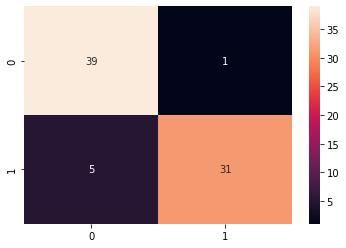

In [154]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_pred,y_test)

sns.heatmap(cm,annot=True)

**Visualising the Training set results**

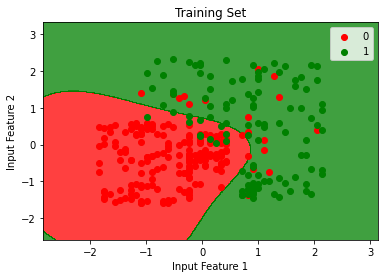

In [158]:
from matplotlib.colors import ListedColormap  

X1, X2 = np.meshgrid(np.arange(start = x_train_scaler[:, 0].min() - 1, stop = x_train_scaler[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_train_scaler[:, 1].min() - 1, stop = x_train_scaler[:, 1].max() + 1, step = 0.01))

Z = svc.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

plt.contourf(X1, X2, Z, alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_train)):
    plt.scatter(x_train_scaler[y_train == j, 0], x_train_scaler[y_train == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Training Set')
plt.xlabel('Input Feature 1')
plt.ylabel('Input Feature 2')
plt.legend()
plt.show()

**Visualising the Test set results**

In [155]:
from sklearn.metrics import confusion_matrix
y_pred = svc.predict(x_test_scaler)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[39  5]
 [ 1 31]]


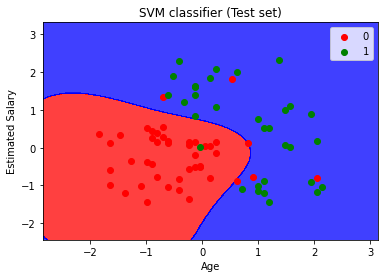

In [161]:
x_set, y_set = x_test_scaler, y_test  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, svc.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','blue' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j)  
plt.title('SVM classifier (Test set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  